# Breast Cancer Classification

Toy dataset provided by Scikit Learn

This is a practice notebook to play with `feature_engine` to reduce dimensionality

<br>
<br>
<br>
<br>

In [1]:
import pyforest
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import seaborn as sns

# plt.style.use('dark_background')

plt.style.use('default')


<br>
<br>

## Load/Inspect Data

In [2]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

<br>
<br>

## Print a Description of the Data

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
print('Target Names: \n', cancer['target_names'])
print('Data shape:     \n', cancer.data.shape)
print('Feature Names: \n', cancer['feature_names'])

Target Names: 
 ['malignant' 'benign']
Data shape:     
 (569, 30)
Feature Names: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


<br>
<br>

## Convert the Data to a DataFrame

In [5]:
df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=np.append(cancer['feature_names'], ['target']))
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890     0.0  
1                  0.1860          0.2750                  0.08902     0.0  
2                  0.2430          0.3613                  0.08758     0.0  
3                  0.2575          0.6638                  0.17300     0.0  
4                  0.1625          0.2364                  0.076

<br>
<br>

<br>
<br>

## Basic Exploratory Data Analysis

In [6]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

<br>
<br>

Here we see very strong correlation between various features

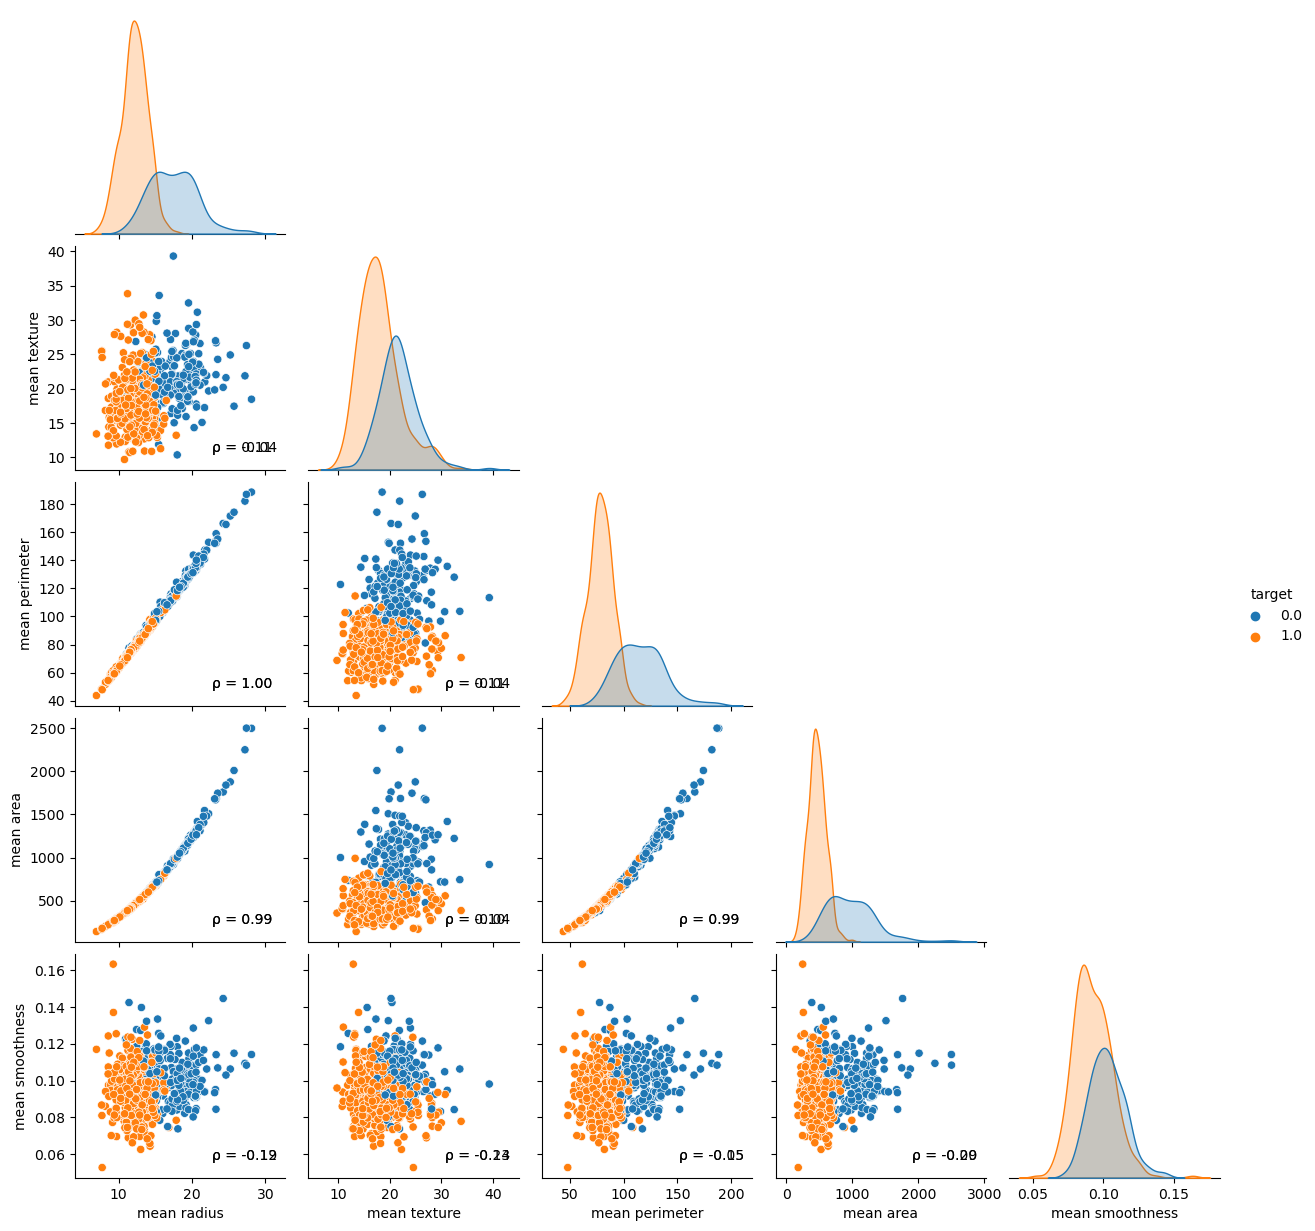

In [7]:
from scipy.stats import pearsonr

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:1.2f}', xy=(.65, .08), xycoords=ax.transAxes)

sns.color_palette("bright")
plot = sns.pairplot(df, vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'], \
    hue='target', corner='True', y_vars=cancer['target_names'])

plot.map_lower(corrfunc)
plt.show()

<br>
<br>

## We notice a class imbalance we'll have to deal with

<AxesSubplot:xlabel='target', ylabel='count'>

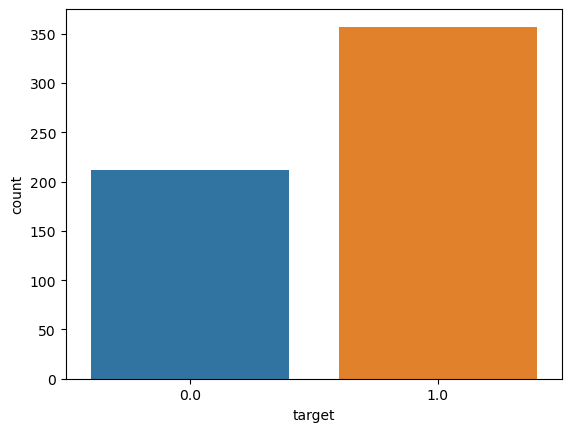

In [8]:
sns.countplot(x=df['target'])

<br>
<br>

## Here is an example if a pair of features

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

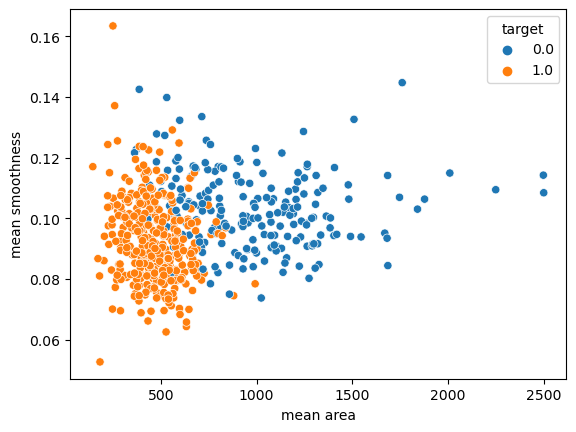

In [9]:
sns.scatterplot(data=df, x='mean area', y='mean smoothness', hue='target')

<AxesSubplot:>

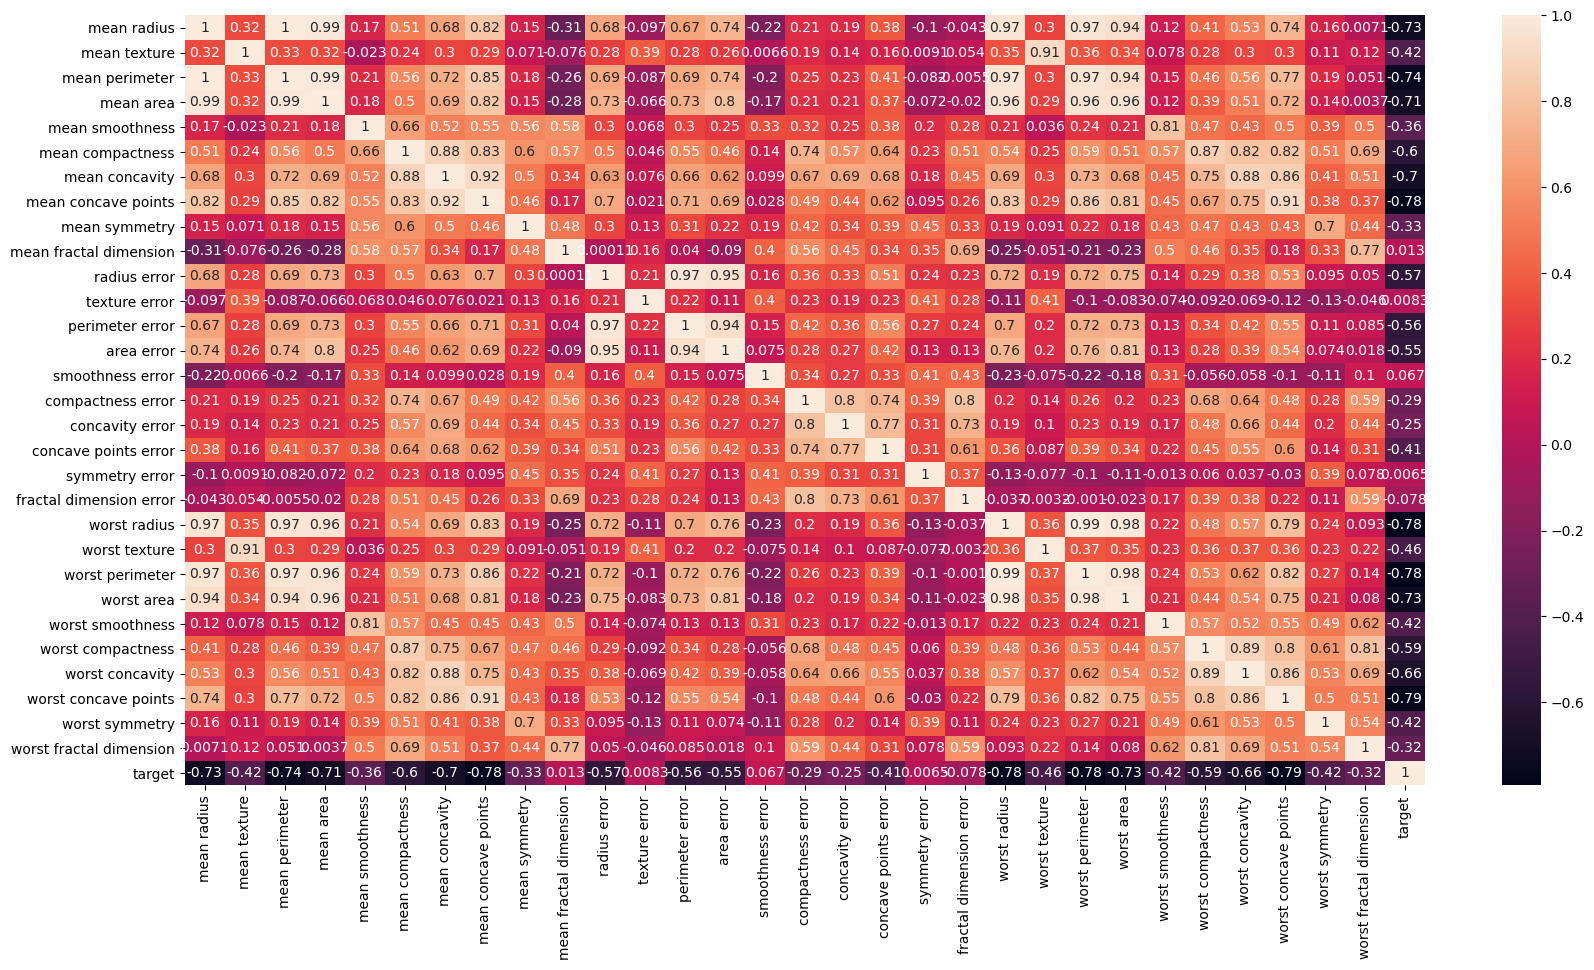

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

<br>
<br>

<br>
<br>

<br>
<br>

<br>
<br>


## Model Definition and Training

In [11]:
X = df.drop('target', axis=1)
y = df.target

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
sX_train = sc.transform(X_train)
sX_test = sc.transform(X_test)

In [14]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC

svc = SVC(class_weight='balanced')

params = {'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0], \
    'kernel': ['poly', 'rbf', 'sigmoid', 'linear'],
    'degree':[2,3,4,5]}

clf = RandomizedSearchCV(svc, params, cv=5, verbose=2, n_jobs=-1, n_iter=100)
search = clf.fit(X_train, y_train)
orig_best_estimator = search.best_estimator_
orig_best_estimator

Fitting 5 folds for each of 100 candidates, totalling 500 fits


SVC(C=10000.0, class_weight='balanced')

In [15]:
# from sklearn.svm import SVC
# from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix, classification_report
# clf = SVC(kernel='rbf', random_state=5, class_weight='balanced').fit(sX_train, y_train)
# y_pred = clf.predict(sX_test)

<br>
<br>

## Fit an SVC

In [16]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, classification_report

y_pred = orig_best_estimator.predict(X_test)

print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, target_names=cancer['target_names']))

F1 Score: 0.9864253393665158
Accuracy Score: 0.9824561403508771
Recall Score: 0.990909090909091
              precision    recall  f1-score   support

   malignant       0.98      0.97      0.98        61
      benign       0.98      0.99      0.99       110

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



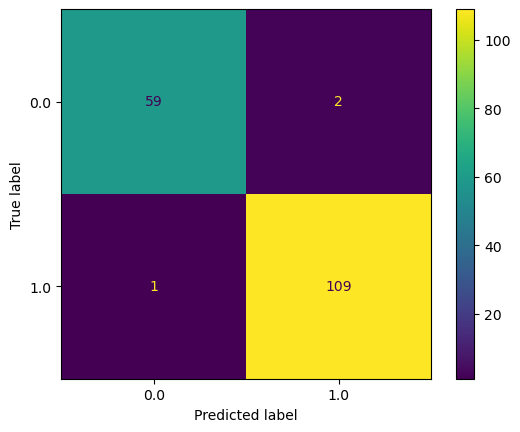

In [17]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

confusion_matrix(y_pred, y_test)
plot_confusion_matrix(orig_best_estimator, X_test, y_test)

<br>
<br>

## ~~~Run a **Series** of Classifier Models to Get an Idea of Performance~~~

In [18]:
import sklearn
sklearn.__version__

'0.24.2'

In [19]:
# import lazypredict
# from lazypredict.Supervised import LazyClassifier
# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split

# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)

# display(models)

<br>
<br>

## Drop Constant Features if They Exist

In [20]:
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures

In [21]:
sel = DropConstantFeatures(tol=0.95, variables=None, missing_values='raise')

sel.fit(X_train)

DropConstantFeatures(tol=0.95,
                     variables=['mean radius', 'mean texture', 'mean perimeter',
                                'mean area', 'mean smoothness',
                                'mean compactness', 'mean concavity',
                                'mean concave points', 'mean symmetry',
                                'mean fractal dimension', 'radius error',
                                'texture error', 'perimeter error',
                                'area error', 'smoothness error',
                                'compactness error', 'concavity error',
                                'concave points error', 'symmetry error',
                                'fractal dimension error', 'worst radius',
                                'worst texture', 'worst perimeter',
                                'worst area', 'worst smoothness',
                                'worst compactness', 'worst concavity',
                                'worst concave 

<br>
<br>

No Constant Features to drop so we move on

In [22]:
sel.features_to_drop_

[]

<br>
<br>

## Dropping Duplicate Features

In [23]:
sel = DropDuplicateFeatures(variables=None, missing_values='raise')
sel.fit(X_train)

DropDuplicateFeatures(missing_values='raise',
                      variables=['mean radius', 'mean texture',
                                 'mean perimeter', 'mean area',
                                 'mean smoothness', 'mean compactness',
                                 'mean concavity', 'mean concave points',
                                 'mean symmetry', 'mean fractal dimension',
                                 'radius error', 'texture error',
                                 'perimeter error', 'area error',
                                 'smoothness error', 'compactness error',
                                 'concavity error', 'concave points error',
                                 'symmetry error', 'fractal dimension error',
                                 'worst radius', 'worst texture',
                                 'worst perimeter', 'worst area',
                                 'worst smoothness', 'worst compactness',
                                 'wors

<br>
<br>

No Duplicated Features to drop so we move on

In [24]:
sel.duplicated_feature_sets_

[]

<br>
<br>

## Drop Correlated Features V1

Here we just set a correlation coefficient threshold and drop anything that exceeds it.

In [25]:
from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection

# Instantiate the Drop Correlated Features Selector
sel = DropCorrelatedFeatures(
    threshold=0.8,
    method='pearson', 
    missing_values='ignore'
)

sel.fit(X_train)

DropCorrelatedFeatures(variables=['mean radius', 'mean texture',
                                  'mean perimeter', 'mean area',
                                  'mean smoothness', 'mean compactness',
                                  'mean concavity', 'mean concave points',
                                  'mean symmetry', 'mean fractal dimension',
                                  'radius error', 'texture error',
                                  'perimeter error', 'area error',
                                  'smoothness error', 'compactness error',
                                  'concavity error', 'concave points error',
                                  'symmetry error', 'fractal dimension error',
                                  'worst radius', 'worst texture',
                                  'worst perimeter', 'worst area',
                                  'worst smoothness', 'worst compactness',
                                  'worst concavity', 'worst concave poi

<br>
<br>

We find 5 sets of correlated features

In [26]:
sel.correlated_feature_sets_

[{'mean area',
  'mean concave points',
  'mean perimeter',
  'mean radius',
  'worst area',
  'worst perimeter',
  'worst radius'},
 {'mean texture', 'worst texture'},
 {'mean smoothness', 'worst smoothness'},
 {'mean compactness',
  'mean concavity',
  'worst compactness',
  'worst concave points',
  'worst concavity'},
 {'area error', 'perimeter error', 'radius error'}]

<br>
<br>

The number of features to drop, given our model

In [27]:
print(f'Length of Features to Drop: {len(sel.features_to_drop_)}')
print('Features to Drop: ', sel.features_to_drop_)


Length of Features to Drop: 14
Features to Drop:  {'worst texture', 'mean perimeter', 'mean concave points', 'worst area', 'worst concave points', 'mean concavity', 'worst concavity', 'worst smoothness', 'mean area', 'area error', 'worst perimeter', 'worst compactness', 'perimeter error', 'worst radius'}


We don't drop these features as yet because we want to play and compare results to SmartCorrelatedSelection

<br>
<br>

## Dropping Features with SmartCorrelatedSelection, using Random Forest (or any model) to test performance.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import NuSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the RF Classifier backend
rf = RandomForestClassifier(
    n_estimators=10,
    random_state=0,
    n_jobs=20,
)

nusvc = NuSVC()

svc = SVC()

knc = KNeighborsClassifier(n_neighbors=8)



# Instantiate the Smart Correlation Selector with the RF model
sel = SmartCorrelatedSelection(
    variables=None,
    method='pearson',
    threshold=0.8,
    missing_values='raise',
    selection_method='model_performance',
    estimator=knc, # rf,
    scoring='roc_auc',
    cv=5,
)

sel.fit(X_train, y_train)

SmartCorrelatedSelection(cv=5, estimator=KNeighborsClassifier(n_neighbors=8),
                         missing_values='raise',
                         selection_method='model_performance',
                         variables=['mean radius', 'mean texture',
                                    'mean perimeter', 'mean area',
                                    'mean smoothness', 'mean compactness',
                                    'mean concavity', 'mean concave points',
                                    'mean symmetry', 'mean fractal dimension',
                                    'radius error', 'texture error',
                                    'perimeter error', 'area error',
                                    'smoothness error', 'compactness error',
                                    'concavity error', 'concave points error',
                                    'symmetry error', 'fractal dimension error',
                                    'worst radius', 'worst texture',
 

In [29]:
group = sel.correlated_feature_sets_
display(group, len(group))

[{'mean area',
  'mean concave points',
  'mean perimeter',
  'mean radius',
  'worst area',
  'worst perimeter',
  'worst radius'},
 {'mean texture', 'worst texture'},
 {'mean smoothness', 'worst smoothness'},
 {'mean compactness',
  'mean concavity',
  'worst compactness',
  'worst concave points',
  'worst concavity'},
 {'area error', 'perimeter error', 'radius error'}]

5

<br>
<br>

## Cross Validating the RF Smart Feature Selection method

In [30]:
from sklearn.model_selection import cross_validate

for f in group:
    model= cross_validate(
        rf, #knc, #svc 
        X_train[f],
        y_train,
        cv=3,
        return_estimator=False,
        scoring='roc_auc'
    )

    print(f, model['test_score'].mean())

{'mean perimeter', 'mean concave points', 'worst area', 'worst perimeter', 'mean area', 'mean radius', 'worst radius'} 0.9702442001386705
{'mean texture', 'worst texture'} 0.7286615327882547
{'mean smoothness', 'worst smoothness'} 0.6820110955539039
{'mean compactness', 'mean concavity', 'worst concavity', 'worst concave points', 'worst compactness'} 0.9626961024394086
{'area error', 'perimeter error', 'radius error'} 0.8981737183069917


In [31]:
X_train

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
47        13.170         18.66           85.98      534.6          0.11580   
527       12.340         12.27           78.94      468.5          0.09003   
435       13.980         19.62           91.12      599.5          0.10600   
21         9.504         12.44           60.34      273.9          0.10240   
554       12.880         28.92           82.50      514.3          0.08123   
..           ...           ...             ...        ...              ...   
8         13.000         21.82           87.50      519.8          0.12730   
73        13.800         15.79           90.43      584.1          0.10070   
400       17.910         21.02          124.40      994.0          0.12300   
118       15.780         22.91          105.70      782.6          0.11550   
206        9.876         17.27           62.92      295.4          0.10890   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
47            0.12310         0.12260              0.07340         0.2128   
527           0.06307         0.02958              0.02647         0.1689   
435           0.11330         0.11260              0.06463         0.1669   
21            0.06492         0.02956              0.02076         0.1815   
554           0.05824         0.06195              0.02343         0.1566   
..                ...             ...                  ...            ...   
8             0.19320         0.18590              0.09353         0.2350   
73            0.12800         0.07789              0.05069         0.1662   
400           0.25760         0.31890              0.11980         0.2113   
118           0.17520         0.21330              0.09479         0.2096   
206           0.07232         0.01756              0.01952         0.1934   

     mean fractal dimension  ...  worst radius  worst texture  \
47                  0.06777  ...         15.67          27.95   
527                 0.05808  ...         13.61          19.27   
435                 0.06544  ...         17.04          30.80   
21                  0.06905  ...         10.23          15.66   
554                 0.05708  ...         13.89          35.74   
..                      ...  ...           ...            ...   
8                   0.07389  ...         15.49          30.73   
73                  0.06566  ...         16.57          20.86   
400                 0.07115  ...         20.80          27.78   
118                 0.07331  ...         20.19          30.50   
206                 0.06285  ...         10.42          23.22   

     worst perimeter  worst area  worst smoothness  worst compactness  \
47            102.80       759.4            0.1786             0.4166   
527            87.22       564.9            0.1292             0.2074   
435           113.90       869.3            0.1613             0.3568   
21             65.13       314.9            0.1324             0.1148   
554            88.84       595.7            0.1227             0.1620   
..               ...         ...               ...                ...   
8             106.20       739.3            0.1703             0.5401   
73            110.30       812.4            0.1411             0.3542   
400           149.60      1304.0            0.1873             0.5917   
118           130.30      1272.0            0.1855             0.4925   
206            67.08       331.6            0.1415             0.1247   

     worst concavity  worst concave points  worst symmetry  \
47           0.50060               0.20880          0.3900   
527          0.17910               0.10700          0.3110   
435          0.40690               0.18270          0.3179   
21           0.08867               0.06227          0.2450   
554          0.24390               0.06493          0.2372   
..               ...                   ...             ...   
8            0.53900               0.20600         

This is the same number of features we found using the naive model

In [32]:
print(f'Length of Features to Drop: {len(sel.features_to_drop_)}')
print('Features to Drop: ', sel.features_to_drop_)


Length of Features to Drop: 14
Features to Drop:  ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'worst radius', 'worst area', 'worst compactness', 'worst concavity']


We start with 30 features before dropping...

In [33]:
len(X_train.columns)

30

In [34]:
X_train_d = X_train.drop(sel.features_to_drop_, axis=1)
X_test_d = X_test.drop(sel.features_to_drop_, axis=1)

display(len(X_train_d.columns), X_train_d.columns)

16

Index(['mean symmetry', 'mean fractal dimension', 'texture error',
       'area error', 'smoothness error', 'compactness error',
       'concavity error', 'concave points error', 'symmetry error',
       'fractal dimension error', 'worst texture', 'worst perimeter',
       'worst smoothness', 'worst concave points', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')

After dropping correlated features, we are left with 16 of them
... that's nearly 50% of our original features.  Not bad!

<br>
<br>

## We rerun LazyClassifier to check performance of the various models

Notice that while the top models are still 98% accurate, the bottom half of the table has been reshuffled and accuracy has degraded somewhat (~2%).

In [35]:
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train_d, X_test_d, y_train, y_test)

# display(models)

<br>
<br>

## Far fewer features, some with moderate correlation

<AxesSubplot:>

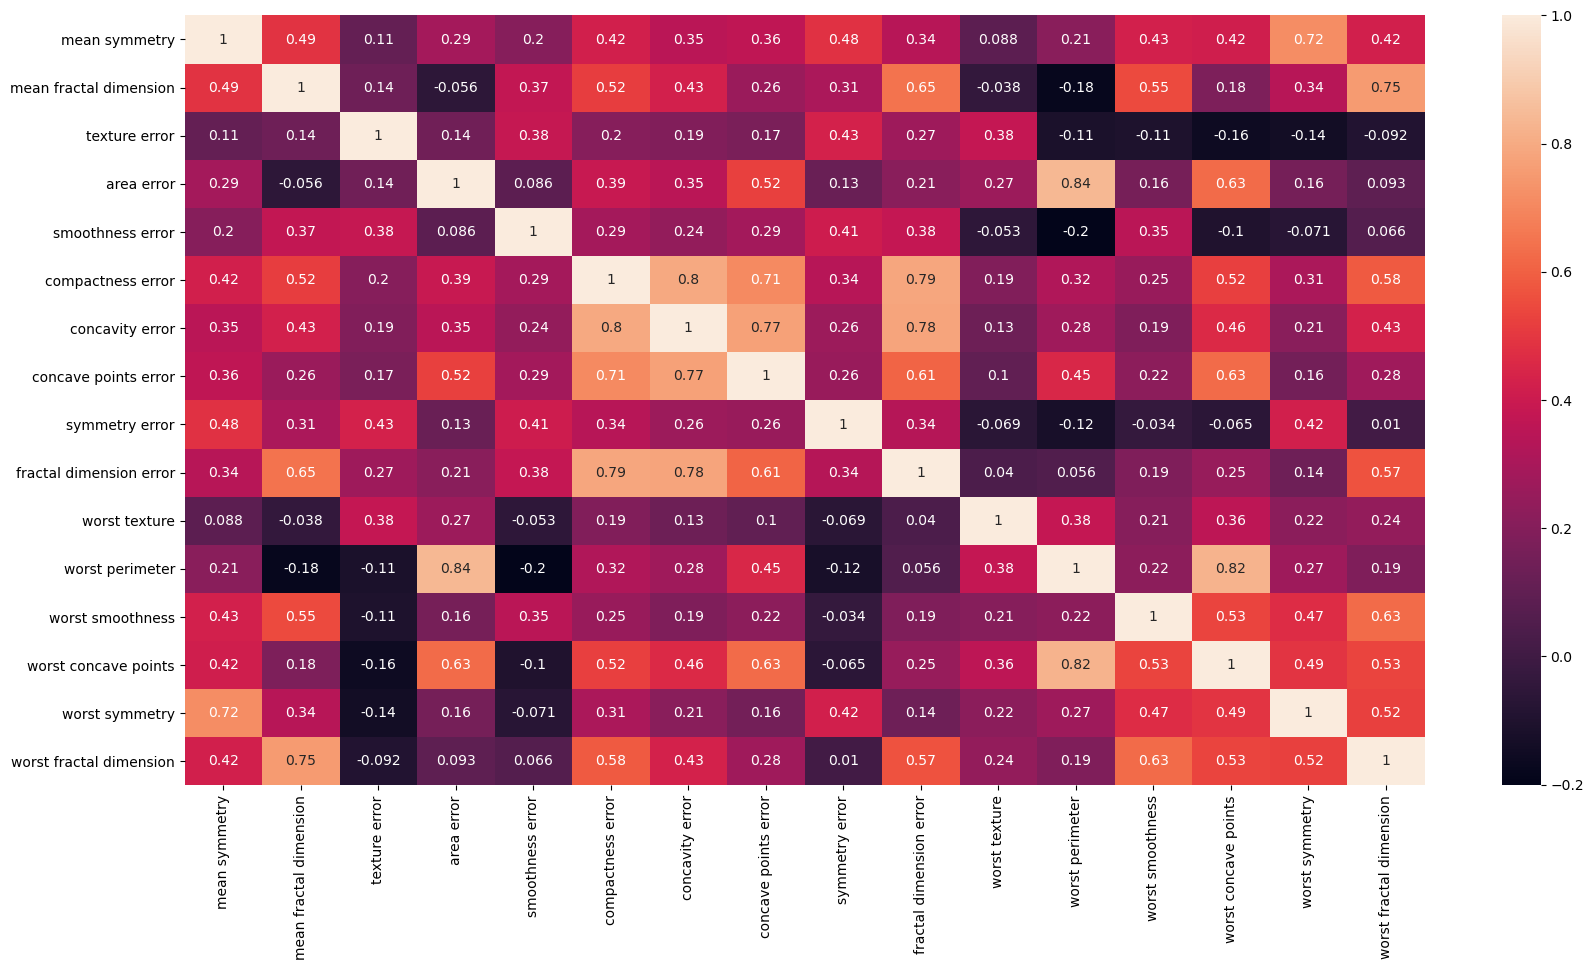

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train_d.corr(), annot=True)

<br>
<br>

## Here we see that most of the strongly correlated features have been removed.

Interestingly, `Area Error <--> Worst Area` has been retained with a pearson correlation coefficient of 0.87

It turns out that dropping Worst Perimeter decreases our model's performance (accuracy & F1) by between 2% and 3% ... so we keep it.  


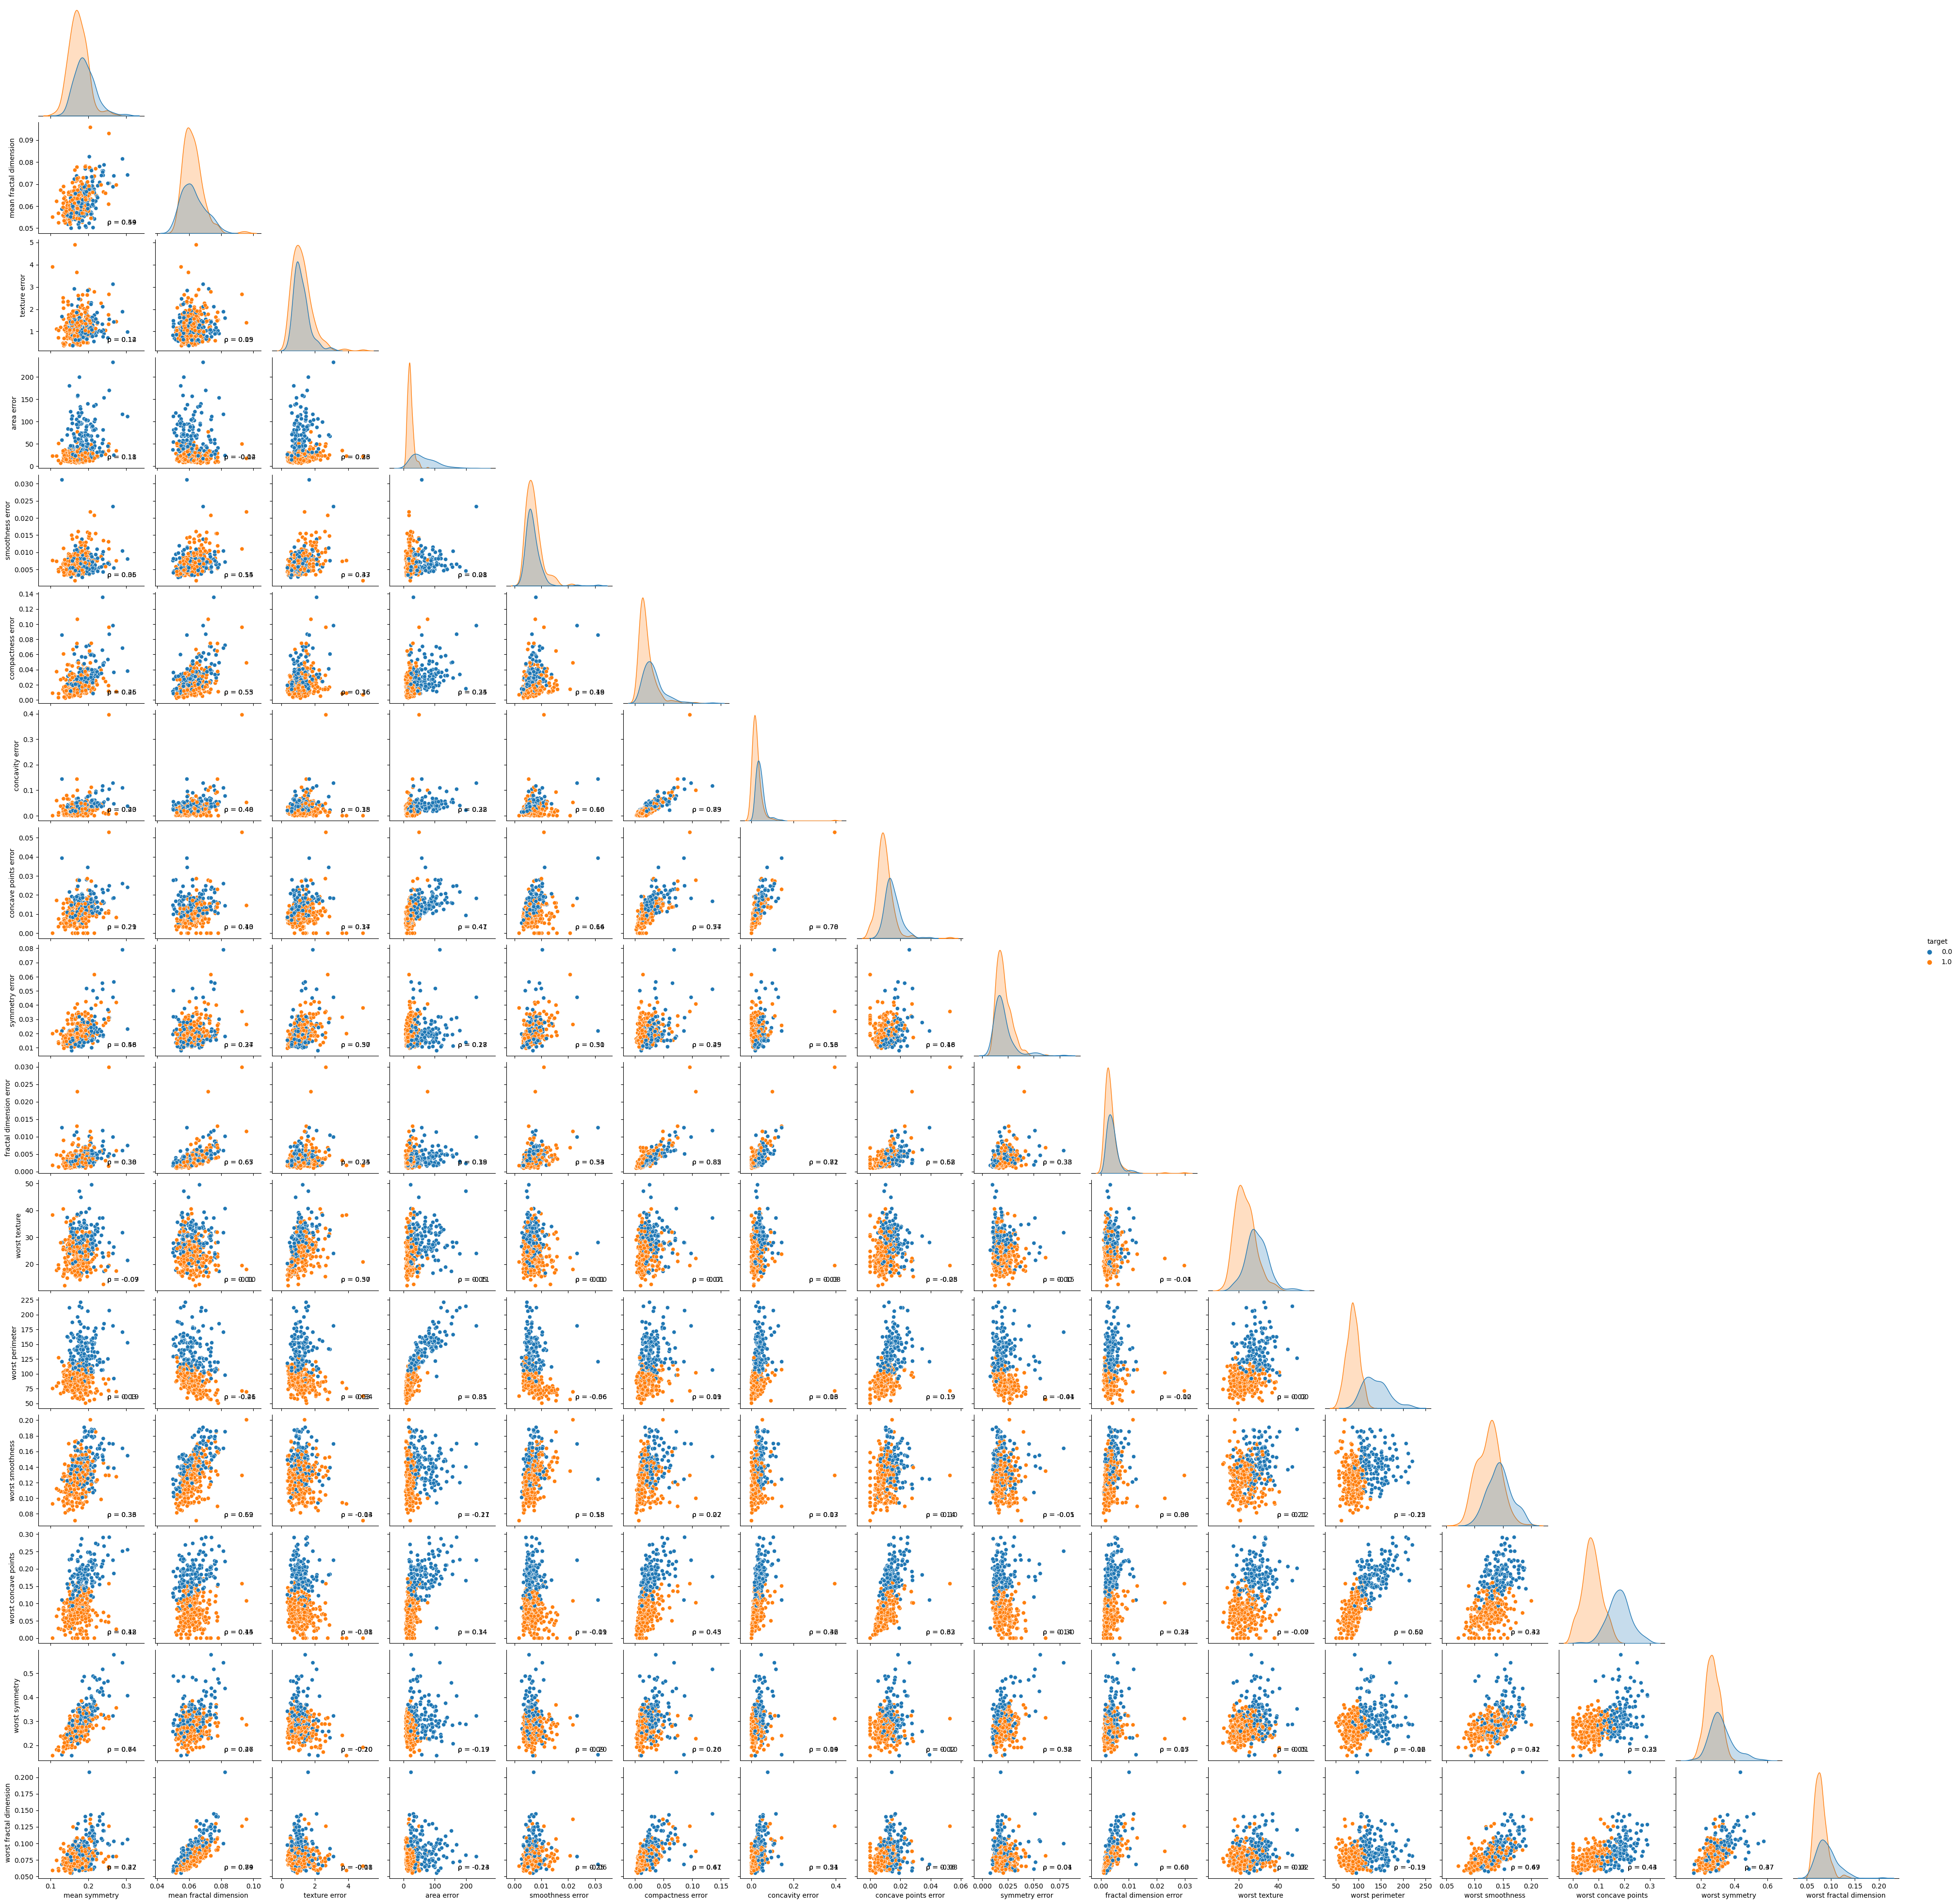

In [37]:
from scipy.stats import pearsonr

plot = sns.pairplot(pd.concat([X_train_d, y_train], axis=1), hue='target', corner=True)
plot.map_lower(corrfunc)
plt.show()

In [38]:
X_train_d

mean symmetry  mean fractal dimension  texture error  area error  \
47          0.2128                 0.06777         0.8937      24.250   
527         0.1689                 0.05808         0.4957       8.955   
435         0.1669                 0.06544         0.9533      18.850   
21          0.1815                 0.06905         0.9768      15.700   
554         0.1566                 0.05708         1.3600      16.830   
..             ...                     ...            ...         ...   
8           0.2350                 0.07389         1.0020      24.320   
73          0.1662                 0.06566         0.6205      23.350   
400         0.2113                 0.07115         0.7747      41.510   
118         0.2096                 0.07331         1.0720      58.630   
206         0.1934                 0.06285         1.3420      12.330   

     smoothness error  compactness error  concavity error  \
47           0.006532           0.023360         0.029050   
527          0.003681           0.009169         0.008732   
435          0.005314           0.017910         0.021850   
21           0.009606           0.014320         0.019850   
554          0.008412           0.021530         0.038980   
..                ...                ...              ...   
8            0.005731           0.035020         0.035530   
73           0.004717           0.020650         0.017590   
400          0.007159           0.037180         0.061650   
118          0.008699           0.039760         0.059500   
206          0.009719           0.012490         0.007975   

     concave points error  symmetry error  fractal dimension error  \
47               0.012150         0.01743                 0.003643   
527              0.005740         0.01129                 0.001366   
435              0.009567         0.01223                 0.002846   
21               0.014210         0.02027                 0.002968   
554              0.007620         0.01695                 0.002801   
..                    ...             ...                      ...   
8                0.012260         0.02143                 0.003749   
73               0.009206         0.01220                 0.003130   
400              0.010510         0.01591                 0.005099   
118              0.013900         0.01495                 0.005984   
206              0.007527         0.02210                 0.002472   

     worst texture  worst perimeter  worst smoothness  worst concave points  \
47           27.95           102.80            0.1786               0.20880   
527          19.27            87.22            0.1292               0.10700   
435          30.80           113.90            0.1613               0.18270   
21           15.66            65.13            0.1324               0.06227   
554          35.74            88.84            0.1227               0.06493   
..             ...              ...               ...                   ...   
8            30.73           106.20            0.1703               0.20600   
73           20.86           110.30            0.1411               0.13830   
400          27.78           149.60            0.1873               0.19640   
118          30.50           130.30            0.1855               0.20340   
206          23.22            67.08            0.1415               0.05588   

     worst symmetry  worst fractal dimension  
47           0.3900                  0.11790  
527          0.3110                  0.07592  
435          0.3179                  0.10550  
21           0.2450                  0.07773  
554          0.2372                  0.07242  
..              ...                      ...  
8            0.4378                  0.10720  
73           0.2589                  0.10300  
400          0.3245                  0.11980  
118          0.3274                  0.12520  
206          0.2989                  0.07380  

[398 rows x 16 columns]

<br>
<br>

## Run a RandomizedSearch to Find "the best" Parameters

In [39]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

svc = SVC(class_weight='balanced')

params = {'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0], \
    'kernel': ['poly', 'rbf', 'sigmoid', 'linear'],
    'degree':[2,3,4,5]}

clf = RandomizedSearchCV(svc, params, cv=5, verbose=2, n_jobs=-1, n_iter=100)
search = clf.fit(X_train_d, y_train)
search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


SVC(C=1000.0, class_weight='balanced', degree=4, kernel='linear')

<br>
<br>

## Look at the Model's Performance

In [40]:
y_pred_d = search.best_estimator_.predict(X_test_d)
print(classification_report(y_test, y_pred_d, target_names=cancer['target_names']))
print('------------------------------------------------')
print(f'F1 Score:             {f1_score(y_test, y_pred_d)}')
print(f'Accuracy Score:       {accuracy_score(y_test, y_pred_d)}')
print(f'Recall Score:         {recall_score(y_test, y_pred_d)}')

              precision    recall  f1-score   support

   malignant       0.98      0.97      0.98        61
      benign       0.98      0.99      0.99       110

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

------------------------------------------------
F1 Score:             0.9864253393665158
Accuracy Score:       0.9824561403508771
Recall Score:         0.990909090909091


<br>
<br>

## Showing the old model's performance for reference:

In [41]:
y_pred = orig_best_estimator.predict(X_test)
print(classification_report(y_test, y_pred, target_names=cancer['target_names']))
print('------------------------------------------------')
print(f'F1 Score:             {f1_score(y_test, y_pred)}')
print(f'Accuracy Score:       {accuracy_score(y_test, y_pred)}')
print(f'Recall Score:         {recall_score(y_test, y_pred)}')

              precision    recall  f1-score   support

   malignant       0.98      0.97      0.98        61
      benign       0.98      0.99      0.99       110

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

------------------------------------------------
F1 Score:             0.9864253393665158
Accuracy Score:       0.9824561403508771
Recall Score:         0.990909090909091


<br>
<br>

## Findings:

1. In this situation, we were able to decrease dimensionality by almost 47%
2. We were also able to maintain the exact same performance across accuracy and F1.

To be able to maintain a high level of accuracy and drop the dimensionality was a useful experiment. 